# Initialisation
Import des packages utile

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analyse des données
On commence par importer les données depuis un fichier CSV

In [12]:
d = pd.read_csv('data/old/SensorTile_Log_N008.csv')
d.columns

Index(['T [ms]', 'AccX [mg]', 'AccY [mg]', 'AccZ [mg]', 'GyroX [mdps]',
       'GyroY [mdps]', 'GyroZ [mdps]'],
      dtype='object')

In [14]:
def cleanDataframe(df):
    df = df.drop(columns=["T [ms]"])
    return df

def sliceDf(df, step):
    res = []
    while (len(df) > step):
        res.append(df.iloc[:step])
        df = df.iloc[step:]
    return res

In [15]:
#d = cleanDataframe(d)
d.tail(10)

,AccX [mg],AccY [mg],AccZ [mg],GyroX [mdps],GyroY [mdps],GyroZ [mdps]
693,-85,281,-98,-248570,380940,-58030
694,-86,219,-88,-255920,403620,-20580
695,-97,288,-128,-252560,410060,-19950
696,-118,459,-213,-207060,418810,-39620
697,-153,625,-252,-72310,450730,-59640
698,393,1574,304,128100,509040,-48020
699,-383,270,-550,155610,632240,15120
700,-338,138,-845,-515480,1146670,103740
701,-1314,777,-1101,-438760,1355410,114520
702,-1681,0,-1220,-22750,1711920,140980


In [16]:
dfs = sliceDf(d, 100)
len(d)

703

In [17]:
len(dfs)

7

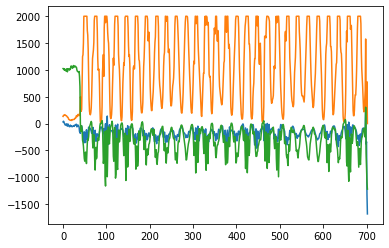

In [18]:
plt.plot(d["AccX [mg]"])
plt.plot(d["AccY [mg]"])
plt.plot(d["AccZ [mg]"])

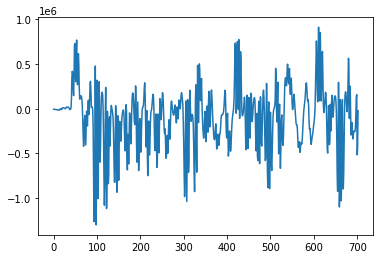

In [19]:
plt.plot(d["GyroX [mdps]"])

# Fetch balancier data depuis Gsheet

Récupération du résultat attendu depuis un Google Sheet

In [20]:
from gSheet import SheetAPI

ModuleNotFoundError: No module named 'googleapiclient'

In [21]:
# The ID and range of a sample spreadsheet.
SPREADSHEET_ID = '1By59dQ56zL_kP0tW9Iyf4FppyEvJtcwnuG4gx1iokpM'
api = SheetAPI(SPREADSHEET_ID)
api.connect()
print(api.getValues("A2:B100"))

[['0', 'Oui'], ['1', 'Oui'], ['2', 'Oui'], ['3', 'Non'], ['4', 'Non'], ['5', 'Oui'], ['6', 'Non'], ['7', 'Oui'], ['8', 'Non'], ['9', 'Oui'], ['10', 'Oui'], ['11', 'Oui'], ['12', 'Non'], ['13', 'Oui'], ['14', 'Oui'], ['15', 'Oui'], ['16', 'Oui'], ['17', 'Oui'], ['18', 'Non'], ['19', 'Non'], ['20', 'Non'], ['21', 'Oui'], ['22', 'Oui'], ['23', 'Oui'], ['24', 'Oui'], ['25', 'Oui'], ['26', 'Non'], ['27', 'Oui'], ['28', 'Oui'], ['29', 'Non'], ['30', 'Non'], ['31', 'Oui'], ['32', 'Non']]


# Parsing the data

Given the data, we can parse it to extract the information we need.

First we slice the dataframe into multiple 1-sec **rolling** windows
Then we multiply the data by sampling the data into subsets.

In [ ]:
SAMPLE_RATE = 50 # Hz
DATA_RATE = 20 # Hz
WINDOW_LENGTH = 2000 # (in ms)

In [ ]:

def sliceDf(df, step):
    res = []
    while (len(df) > step):
        res.append(df.iloc[:step])
        df = df.iloc[1:]
    return res

def removeTime(df):
    df = df.drop(columns=["T [ms]"])
    return df

def sampleDf(df, sample):
    res = []
    for i in range(0, sample): # A tester
        res.append(df.iloc[lambda x: x.index % sample == i])
    return res

In [22]:
d = pd.read_csv('data/balancier0.csv')
d.columns

Index(['T [ms]', 'AccX [mg]', 'AccY [mg]', 'AccZ [mg]', 'GyroX [mdps]',
       'GyroY [mdps]', 'GyroZ [mdps]'],
      dtype='object')

In [23]:
d.tail(10)

,T [ms],AccX [mg],AccY [mg],AccZ [mg],GyroX [mdps],GyroY [mdps],GyroZ [mdps]
693,16373,-85,281,-98,-248570,380940,-58030
694,16393,-86,219,-88,-255920,403620,-20580
695,16413,-97,288,-128,-252560,410060,-19950
696,16433,-118,459,-213,-207060,418810,-39620
697,16453,-153,625,-252,-72310,450730,-59640
698,16473,393,1574,304,128100,509040,-48020
699,16493,-383,270,-550,155610,632240,15120
700,16513,-338,138,-845,-515480,1146670,103740
701,16533,-1314,777,-1101,-438760,1355410,114520
702,16553,-1681,0,-1220,-22750,1711920,140980
